In [124]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
# Regression models
from sklearn.linear_model import LinearRegression


In [76]:
train=pd.read_csv("train_labels.csv")
test=pd.read_csv("test_ids.csv")

# EDA

In [77]:
train.shape

(4020, 6)

In [78]:
test.shape

(607, 2)

In [79]:
train.tail()

,Unnamed: 0,img_id,fuel,parking,restaurant,transport
4015,4015,2056,0,0,0,1
4016,4016,3,0,0,0,1
4017,4017,3877,0,0,1,0
4018,4018,1686,0,0,1,0
4019,4019,3460,0,1,0,0


In [80]:
test.head()

,img_id,target
0,1078,NaN
1,845,NaN
2,1231,NaN
3,1150,NaN
4,773,NaN


In [81]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4020 entries, 0 to 4019
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  4020 non-null   int64
 1   img_id      4020 non-null   int64
 2   fuel        4020 non-null   int64
 3   parking     4020 non-null   int64
 4   restaurant  4020 non-null   int64
 5   transport   4020 non-null   int64
dtypes: int64(6)
memory usage: 188.6 KB


In [82]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   img_id  607 non-null    int64  
 1   target  0 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 9.6 KB


In [83]:
train.drop("Unnamed: 0",axis=1,inplace=True)

In [84]:
test.drop("target",axis=1,inplace=True)

In [85]:
cat_cols = list(train)
for col in cat_cols:
    print(col, train[col].nunique())

img_id 4020
fuel 2
parking 2
restaurant 2
transport 2


In [86]:
train.describe()

,img_id,fuel,parking,restaurant,transport
count,4020.000000,4020.000000,4020.000000,4020.000000,4020.000000
mean,2306.685075,0.303980,0.164925,0.238060,0.293035
std,1266.127053,0.460031,0.371159,0.425949,0.455211
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1221.500000,0.000000,0.000000,0.000000,0.000000
50%,2349.500000,0.000000,0.000000,0.000000,0.000000
75%,3405.250000,1.000000,0.000000,0.000000,1.000000
max,4426.000000,1.000000,1.000000,1.000000,1.000000


# Feature Engineering

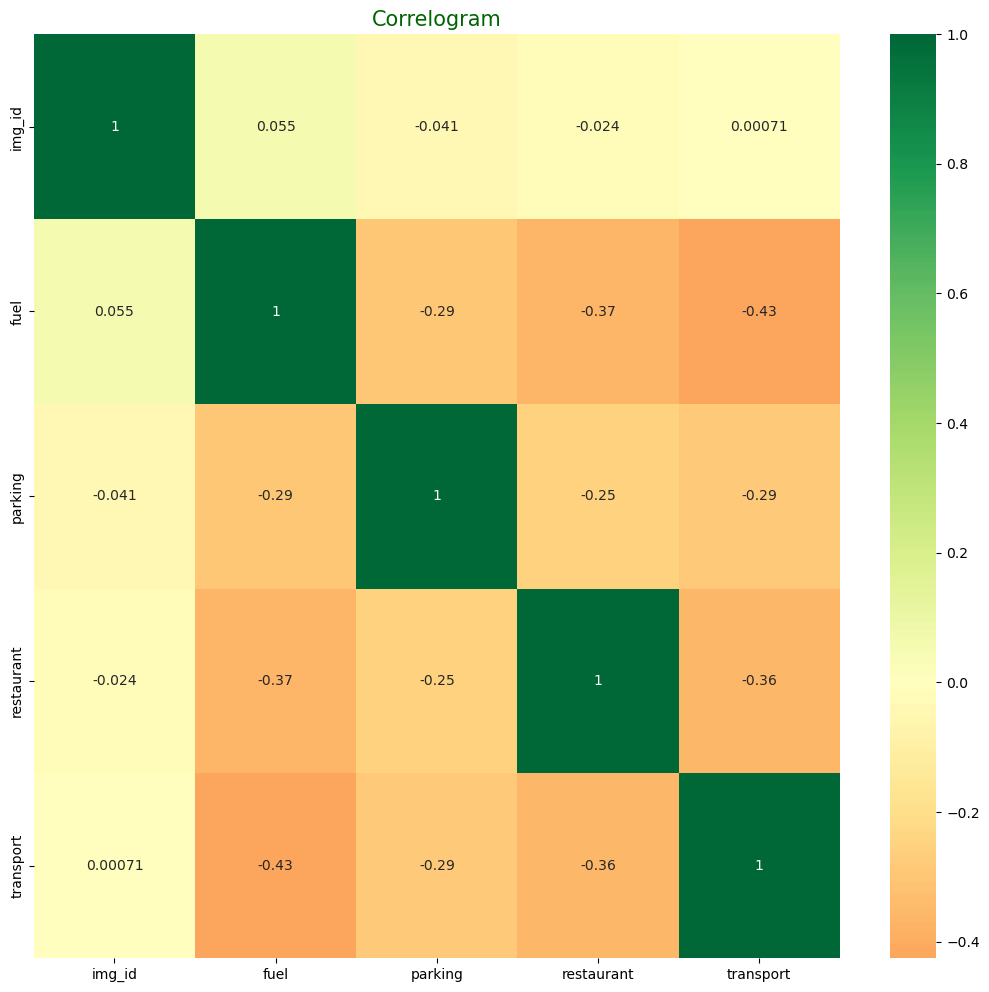

In [87]:
# Plotting a heatmap to show correlations between variables
corr = train.corr()
plt.figure(figsize = (13, 12))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

# Model

In [121]:
X=train.drop(['fuel','parking','restaurant','transport'],axis=1).values
y=train[['fuel','parking','restaurant','transport']].values
scores=[]
kf=KFold(n_splits=5)
for train_index,test_index in kf.split(X,y):
    X_train,y_train=X[train_index],y[train_index]
    X_test,y_test=X[test_index],y[test_index]
    
    xg=LinearRegression()
    xg.fit(X_train,y_train)
    y_pred=xg.predict(X_test)
    scores.append(mean_squared_error(y_pred,y_test,squared=False))
    
print("mean:",np.mean(scores))


mean: 0.427912574574821


In [20]:
xg.fit(X,y)
test[['fuel','parking','restaurant','transport']]=xg.predict(test)

# Submission

In [22]:
submission=pd.DataFrame({"img_id":test.img_id,"fuel":test['fuel'],'parking':test['parking'],
                         'restaurant':test['restaurant'],'transport':test['transport']})
submission.to_csv("my_submission.csv",index=False)

In [23]:
# submission.head()

,img_id,fuel,parking,restaurant,transport
0,1078,0.380556,0.211111,0.247222,0.161111
1,845,0.290598,0.179487,0.367521,0.162393
2,1231,0.380556,0.211111,0.247222,0.161111
3,1150,0.380556,0.211111,0.247222,0.161111
4,773,0.290598,0.179487,0.367521,0.162393
